The 3 datasets attached from Sprocket Central Pty Ltd:

1.Customer Demographic

2.Customer Addresses

3.Transaction data in the past three months

In first part is review the data quality to ensure that it is ready for analysis. The marketing team is looking to boost business by analysing their existing customer dataset to determine customer trends and behaviour. Using the existing 3 datasets (Customer demographic, customer address and transactions) as a labelled dataset, recommend which of 1000 new customers should be targeted to drive the most value for the organisation. 

 In Transaction Table, There are thirteen columns. The product first sold is in the wrong type. I changed it to date time. Replace zero in the online order column. I found that 197 values are missing. It might be because no data in the brand column so I drop these missing data. I made the Profit column by taking the list price and standard cost to calculate the overall profit in each transaction.

   ### In this summary, I would use the Australian dollar for the currency.
       This data have 6 brands of high-quality bikes and accessible cycling accessories for riders. There are Giant Bicycles, Norco Bicycles, OHM Cycles, Solex, Trek Bicycles, and WeareA2B. There are four products type. They are standard, Road, Mountain, and Touring. WeareA2B got the best profit total 2,717,685.68. Norco Bicycles got a worse profit of 853251.62. Fifty percent of people didn't purchase online. People might want to see a real product before purchasing. The standard bicycle is the most sold out in every brand but Solex is the most brand sold out. Trek Bicycles and Norco Bicycles might be for customers who like Road and mountain bicycles. WeareA2B sold out most touring bicycles. Most Customers purchase a medium quality product and medium size.
        In the Customer Address table, Customers live in three different states. There are New South Wales, Queensland,  and Victoria. The property valuation has twelve ranks. Most people live in New south wales with a high valuation. Queensland and Victoria are almost similar. Customer's property valuations are distributed.
        
       



#### With the interaction report, I would use google data studio to summarize profit in each dimension. The link is below.
       
       https://datastudio.google.com/reporting/a31fe984-71a0-4ffe-9bf9-f5d3e3f2ccb8

# Transaction Table

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline
sns.set(rc={'figure.figsize':(9,5)})
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = 40

In [2]:
df = pd.read_excel(r'transaction - Copy.xlsx')
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.00,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.00
1,2,3,3120,2017-05-21,1.00,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.00
2,3,37,402,2017-10-16,0.00,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.00
3,4,88,3135,2017-08-31,0.00,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.00
4,5,78,787,2017-10-01,1.00,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [4]:
df['product_first_sold_date'] = pd.to_datetime(df['product_first_sold_date'])
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.00,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 00:00:00.000041245
1,2,3,3120,2017-05-21,1.00,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 00:00:00.000041701
2,3,37,402,2017-10-16,0.00,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 00:00:00.000036361
3,4,88,3135,2017-08-31,0.00,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 00:00:00.000036145
4,5,78,787,2017-10-01,1.00,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 00:00:00.000042226


In [5]:
df.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df[df['online_order'].isnull()].head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
97,98,49,333,2017-06-23,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,1970-01-01 00:00:00.000037823
166,167,90,3177,2017-04-26,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,1970-01-01 00:00:00.000038482
169,170,6,404,2017-10-16,NaN,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,1970-01-01 00:00:00.000037838
250,251,63,1967,2017-04-11,NaN,Approved,Solex,Standard,medium,medium,1483.20,99.59,1970-01-01 00:00:00.000042145
300,301,78,2530,2017-03-24,NaN,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 00:00:00.000035455


In [8]:
#replace zero in online_order column.
df['online_order'].fillna(0.0)

0       0.00
1       1.00
2       0.00
3       0.00
4       1.00
        ... 
19995   1.00
19996   1.00
19997   1.00
19998   0.00
19999   1.00
Name: online_order, Length: 20000, dtype: float64

In [9]:
df[df['brand'].isna()].head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
136,137,0,431,2017-09-23,0.00,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaT
159,160,0,3300,2017-08-27,0.00,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaT
366,367,0,1614,2017-03-10,0.00,Approved,NaN,NaN,NaN,NaN,850.89,NaN,NaT
406,407,0,2559,2017-06-14,1.00,Approved,NaN,NaN,NaN,NaN,710.59,NaN,NaT
676,677,0,2609,2017-07-02,0.00,Approved,NaN,NaN,NaN,NaN,1972.01,NaN,NaT


In [10]:
df.dropna(inplace=True)
df.isna().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In the transaction table, There are seven-column empty. I found that It might be because the product id is zero. It made all specific columns got empty. I would drop all empty values.

In [11]:
df['Profit'] = df['list_price']-df['standard_cost']

In [12]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,1,2,2950,2017-02-25,0.00,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 00:00:00.000041245,17.87
1,2,3,3120,2017-05-21,1.00,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 00:00:00.000041701,1702.55
2,3,37,402,2017-10-16,0.00,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 00:00:00.000036361,1544.61
3,4,88,3135,2017-08-31,0.00,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 00:00:00.000036145,817.36
4,5,78,787,2017-10-01,1.00,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 00:00:00.000042226,1055.82


In [13]:
df.nunique()

transaction_id             19445
product_id                   101
customer_id                 3492
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   100
standard_cost                103
product_first_sold_date      100
Profit                       103
dtype: int64

# Data Wrangling

In [14]:
df.groupby(['brand','product_line','product_class','product_size']).agg({'Profit':sum})

Profit
brand          product_line product_class product_size           
Giant Bicycles Road         low           small          12466.56
                            medium        medium        164373.16
               Standard     high          medium        274750.95
                                          small          41109.39
                            medium        large         572981.91
                                          medium        269733.32
                                          small          27986.44
               Touring      medium        large         177763.52
Norco Bicycles Mountain     low           small          14847.00
               Road         high          large          58244.28
                            medium        large          96610.57
                                          medium        152235.78
               Standard     high          medium         87297.40
                                          small          32905.80
                            low           medium         58836.04
                            medium        medium        315194.52
                                          small          37080.23
OHM Cycles     Road         high          large            926.40
                            medium        medium         99772.62
                                          small          39023.60
               Standard     high          medium        272418.76
                            low           medium        329748.35
                            medium        medium        680206.61
               Touring      low           medium         31465.98
Solex          Road         medium        large         171306.58
                                          medium         17095.36
                                          small          33917.59
               Standard     high          large         137850.79
                                          medium        130701.10
                            low           medium        315780.28
                            medium        large         199809.54
                                          medium       1067587.12
               Touring      medium        large         281782.00
Trek Bicycles  Mountain     low           medium         25514.46
               Road         low           medium        147696.12
                                          small          31420.48
                            medium        large         288880.89
                                          medium         41009.94
               Standard     high          medium         55475.88
                            low           medium        168881.57
                            medium        large         962115.45
                                          medium         22162.00
                                          small          64164.31
WeareA2B       Road         low           small          19738.53
               Standard     low           medium         22095.12
                            medium        medium       1801693.36
                                          small          39843.08
               Touring      medium        large         626870.75
                                          medium        207444.84

In [15]:
df.groupby(df['brand']).agg({'Profit':sum})

,Profit
brand,
Giant Bicycles,1541165.25
Norco Bicycles,853251.62
OHM Cycles,1453562.32
Solex,2355830.36
Trek Bicycles,1807321.10
WeareA2B,2717685.68


In [16]:
pd.crosstab(df['online_order'],columns='N')

col_0,N
online_order,
0.00,9706
1.00,9739


# Exploratory Data Analysis

C:\Users\mook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='brand', ylabel='count'>

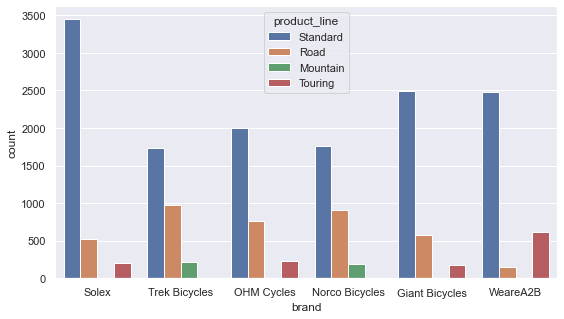

In [17]:
sns.countplot(df['brand'],hue=df['product_line'])

C:\Users\mook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='brand', ylabel='count'>

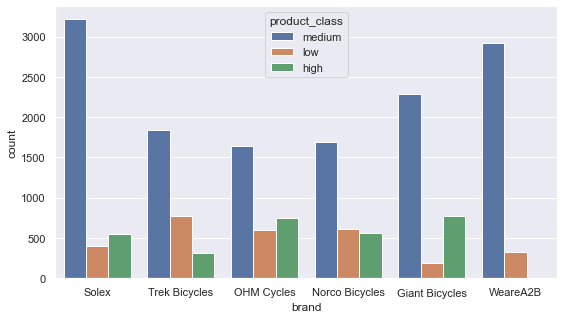

In [18]:
sns.countplot(df['brand'],hue=df['product_class'])

C:\Users\mook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='brand', ylabel='count'>

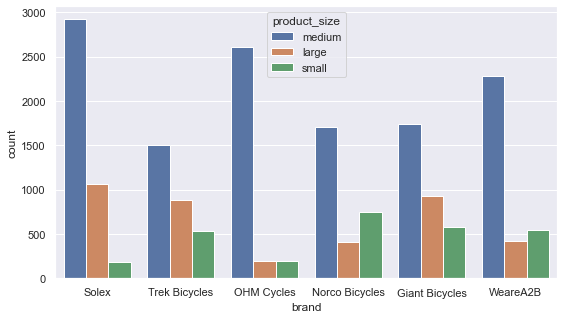

In [19]:
sns.countplot(df['brand'],hue=df['product_size'])

# Customer Address

In [20]:
df2 = pd.read_excel('customeradress.xlsx')
df2.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [22]:
df2.describe()

,customer_id,postcode,property_valuation
count,3999.00,3999.00,3999.00
mean,2003.99,2985.76,7.51
std,1154.58,844.88,2.82
min,1.00,2000.00,1.00
25%,1004.50,2200.00,6.00
50%,2004.00,2768.00,8.00
75%,3003.50,3750.00,10.00
max,4003.00,4883.00,12.00


In [23]:
df2.duplicated().sum()

0

In [24]:
df2.nunique()

customer_id           3999
address               3996
postcode               873
state                    5
country                  1
property_valuation      12
dtype: int64

In [25]:
df2['state'].unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [26]:
df2.replace(['NSW','VIC','QLD'],['New South Wales','Victoria','Queensland'],inplace=True)
df2['state'].unique()

array(['New South Wales', 'Queensland', 'Victoria'], dtype=object)

C:\Users\mook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='state', ylabel='count'>

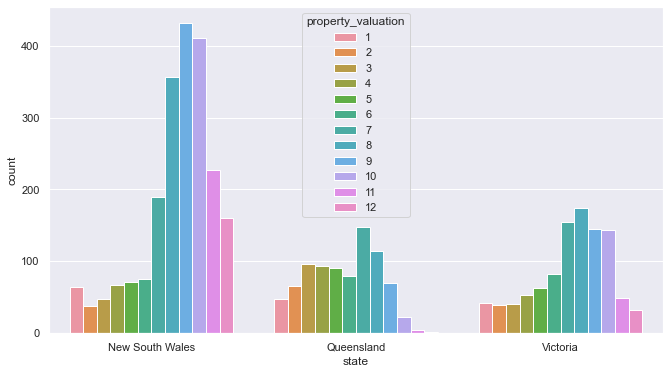

In [27]:
sns.set(rc={'figure.figsize':(11,6)})
sns.countplot(df2['state'],hue=df2['property_valuation'])

# Customer Demographic

In [28]:
df3 = pd.read_excel('CustomerDemographic.xlsx')
df3.head()

C:\Users\mook\AppData\Local\Temp\ipykernel_4992\591089210.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df3 = pd.read_excel('CustomerDemographic.xlsx')


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.00
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.00
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.00
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.00
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.00


In [29]:
df3.drop(['default'],axis=1,inplace=True)

In [30]:
df3.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.00
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.00
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.00
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.00
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.00


In [31]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

# Data Wrangling

In [32]:
df3.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.00,4000.00,3913.00
mean,2000.50,48.89,10.66
std,1154.84,28.72,5.66
min,1.00,0.00,1.00
25%,1000.75,24.00,6.00
50%,2000.50,48.00,11.00
75%,3000.25,73.00,15.00
max,4000.00,99.00,22.00


In [33]:
df3['DOB'] = pd.to_datetime(df3['DOB'],format='%Y%m%d')
df3['DOB'].head()

0   1953-10-12
1   1980-12-16
2   1954-01-20
3   1961-10-03
4   1977-05-13
Name: DOB, dtype: datetime64[ns]

In [34]:
now = datetime.today()
now

datetime.datetime(2022, 5, 17, 20, 26, 20, 315454)

In [35]:
((now-df3['DOB']).dt.days)//365

0      68.00
1      41.00
2      68.00
3      60.00
4      45.00
        ... 
3995   46.00
3996   20.00
3997     NaN
3998   48.00
3999   30.00
Name: DOB, Length: 4000, dtype: float64

In [36]:
def Age(x):
    return ((now-x).dt.days)//365

In [37]:
age = Age(df3['DOB'])

In [38]:
df3= pd.concat([df3,age.rename('Age')],axis=1)

In [39]:
df3.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
Age                                     87
dtype: int64

In [40]:
df3.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
owns_car                                  2
tenure                                   22
Age                                      54
dtype: int64

In [41]:
df3['gender'].unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [42]:
(df3['gender']=='U').sum()

88

In [43]:
df3['gender'].replace({'F':'Female','Femal':'Female','U':'Female','M':'Male'},inplace=True)

In [44]:
(df3['deceased_indicator']=='Y').sum()

2

In [45]:
pd.crosstab(df3['owns_car'],columns='N')

col_0,N
owns_car,
No,1976
Yes,2024


# Feature Engineering

C:\Users\mook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

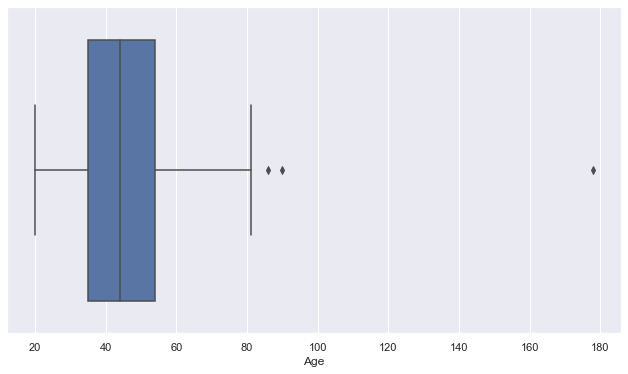

In [46]:
sns.boxplot(df3['Age'])

In [47]:
df3['Age'].describe()

count   3913.00
mean      44.38
std       12.81
min       20.00
25%       35.00
50%       44.00
75%       54.00
max      178.00
Name: Age, dtype: float64

In [48]:
IQR = df3['Age'].quantile(0.75)-df3['Age'].quantile(0.25)

In [49]:
Lower_bound = df3['Age'].quantile(0.25) - (IQR*1.5)
Upper_bound = df3['Age'].quantile(0.75) + (IQR*1.5)
print(Lower_bound,Upper_bound)

6.5 82.5


In [50]:
df3[df3.Age>Upper_bound]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
33,34,Jephthah,Bachmann,Female,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.00,178.00
719,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,No,6.00,90.00
1091,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,No,5.00,86.00


In [51]:
df3 = df3[(df3['Age']>Lower_bound) & (df3['Age']<Upper_bound)]
df3.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.00,68.00
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.00,41.00
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.00,68.00
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.00,60.00
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.00,45.00


In [52]:
df3['Age'].describe()

count   3910.00
mean      44.32
std       12.59
min       20.00
25%       35.00
50%       44.00
75%       54.00
max       81.00
Name: Age, dtype: float64

In [53]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3910 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3910 non-null   int64         
 1   first_name                           3910 non-null   object        
 2   last_name                            3789 non-null   object        
 3   gender                               3910 non-null   object        
 4   past_3_years_bike_related_purchases  3910 non-null   int64         
 5   DOB                                  3910 non-null   datetime64[ns]
 6   job_title                            3413 non-null   object        
 7   job_industry_category                3254 non-null   object        
 8   wealth_segment                       3910 non-null   object        
 9   deceased_indicator                   3910 non-null   object        
 10  owns_car    

# Merge All Tables

In [54]:
df_final = pd.merge(pd.merge(df,df2,on='customer_id'),df3,on='customer_id')

In [55]:
df_final.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,2,2950,2017-02-25,0.00,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 00:00:00.000041245,17.87,984 Hoepker Court,3064,Victoria,Australia,6,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.00,67.00
1,11065,1,2950,2017-10-16,0.00,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,1970-01-01 00:00:00.000037659,448.68,984 Hoepker Court,3064,Victoria,Australia,6,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.00,67.00
2,18923,62,2950,2017-04-26,0.00,Approved,Solex,Standard,medium,medium,478.16,298.72,1970-01-01 00:00:00.000040487,179.44,984 Hoepker Court,3064,Victoria,Australia,6,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.00,67.00
3,2,3,3120,2017-05-21,1.00,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 00:00:00.000041701,1702.55,4 Shopko Circle,2196,New South Wales,Australia,5,Lauree,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.00,43.00
4,6862,4,3120,2017-10-05,0.00,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,1970-01-01 00:00:00.000040649,451.65,4 Shopko Circle,2196,New South Wales,Australia,5,Lauree,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.00,43.00


In [56]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18963 entries, 0 to 18962
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       18963 non-null  int64         
 1   product_id                           18963 non-null  int64         
 2   customer_id                          18963 non-null  int64         
 3   transaction_date                     18963 non-null  datetime64[ns]
 4   online_order                         18963 non-null  float64       
 5   order_status                         18963 non-null  object        
 6   brand                                18963 non-null  object        
 7   product_line                         18963 non-null  object        
 8   product_class                        18963 non-null  object        
 9   product_size                         18963 non-null  object        
 10  list_price

In [57]:
Age_range = []
for i in range(0,len(df_final['Age'])):
    if df_final['Age'][i] <= 39:
        Age_range.append('Adult')
    elif df_final['Age'][i] <= 50:
        Age_range.append('Middle Age Adult')
    else:
        Age_range.append('Senior Adult')

In [58]:
Age_data = pd.DataFrame(data=Age_range,columns=['Ages_range'])
df_final = pd.concat([df_final,Age_data],axis=1)
df_final.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,Ages_range
0,1,2,2950,2017-02-25,0.00,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 00:00:00.000041245,17.87,984 Hoepker Court,3064,Victoria,Australia,6,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.00,67.00,Senior Adult
1,11065,1,2950,2017-10-16,0.00,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,1970-01-01 00:00:00.000037659,448.68,984 Hoepker Court,3064,Victoria,Australia,6,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.00,67.00,Senior Adult
2,18923,62,2950,2017-04-26,0.00,Approved,Solex,Standard,medium,medium,478.16,298.72,1970-01-01 00:00:00.000040487,179.44,984 Hoepker Court,3064,Victoria,Australia,6,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.00,67.00,Senior Adult
3,2,3,3120,2017-05-21,1.00,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 00:00:00.000041701,1702.55,4 Shopko Circle,2196,New South Wales,Australia,5,Lauree,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.00,43.00,Middle Age Adult
4,6862,4,3120,2017-10-05,0.00,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,1970-01-01 00:00:00.000040649,451.65,4 Shopko Circle,2196,New South Wales,Australia,5,Lauree,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.00,43.00,Middle Age Adult


In [59]:
df_final.groupby(['gender','wealth_segment','brand'])['Profit'].sum()

gender  wealth_segment     brand         
Female  Affluent Customer  Giant Bicycles   200206.71
                           Norco Bicycles    87669.83
                           OHM Cycles       169546.70
                           Solex            284491.71
                           Trek Bicycles    233722.37
                           WeareA2B         308647.66
        High Net Worth     Giant Bicycles   192371.97
                           Norco Bicycles   113962.44
                           OHM Cycles       179863.09
                           Solex            292900.78
                           Trek Bicycles    231582.00
                           WeareA2B         328764.10
        Mass Customer      Giant Bicycles   375786.69
                           Norco Bicycles   215514.35
                           OHM Cycles       356239.75
                           Solex            588535.54
                           Trek Bicycles    463975.57
                           WeareA2B     